# K-Means Clustering Demo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import euclidean_distances

np.random.seed(513)

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

Attribute Information:

- FRESH: annual spending (m.u.) on fresh products (Continuous); 
- MILK: annual spending (m.u.) on milk products (Continuous); 
- GROCERY: annual spending (m.u.)on grocery products (Continuous); 
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
- CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
- REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [3]:
X = df.drop(['Channel', 'Region'], axis=1)

In [4]:
X = X.apply(lambda x: (x - x.mean()) / x.std())

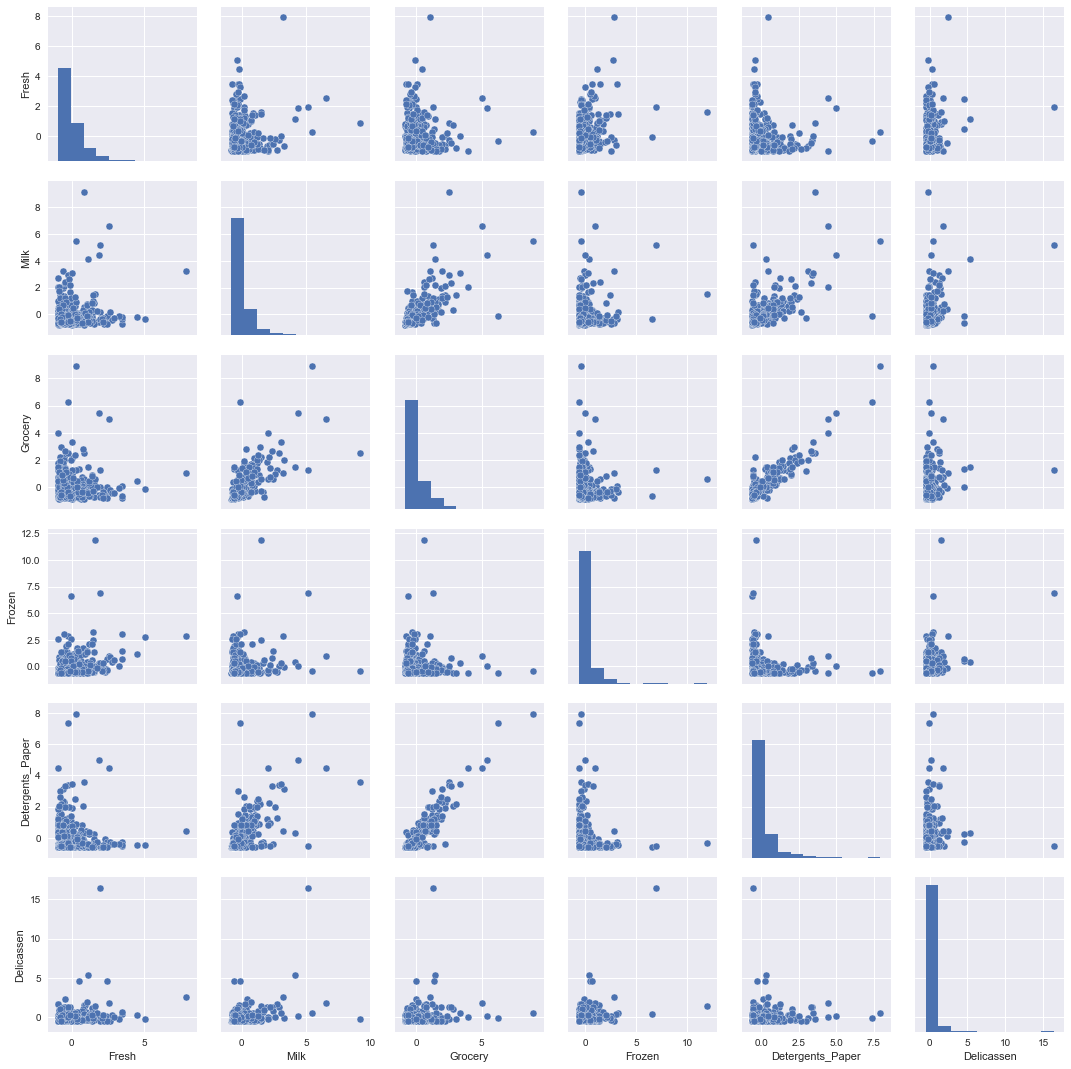

In [5]:
sns.pairplot(X);

Even though we have data on categorical variables, let's ignore them for the purposes of clustering.

Since K-Means is a spatial algorith, let's standardize our columns:

Looking at a series of two-dimensional plots, we can't immediately detect any clusters, but we can see some patterns that may contribute to the formation of clusters in higher dimensions. For example, at a certain point there seems to be a negative relationship between the purchase of detergents and paper and frozen goods. Could this be because different types of customers buy large numbers of frozen goods and large amounts of paper and detergent?


## The K-Means Algorithm:

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid.
4. Make your clusters better. Move each centroid to the center of its cluster.
5. Repeat steps 3-4 until your centroids converge.

# K-Means Clustering From Scratch:

### Pick a value for k

In [6]:
k = 3

### Initialize k centroids

In [7]:
# We can just sample randomly to get starting centroids:
centroids = X.sample(k)
centroids

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
120,0.407968,-0.622768,-0.477660,-0.134907,-0.567864,-0.137892
368,0.817145,-0.623310,-0.583519,-0.211329,-0.583175,-0.342849
201,-0.594299,1.165623,1.763279,0.098270,2.381261,0.055363


### Create your clusters

In [8]:
distances = euclidean_distances(X, centroids)
distances # Distances between row of X and centroids

array([[1.45444826, 1.64391725, 3.23322972],
       [1.70773706, 2.00690107, 2.893023  ],
       [2.85378619, 3.18786735, 3.7000778 ],
       ...,
       [4.63241255, 4.75331972, 1.19310468],
       [0.72481519, 1.12726501, 4.19911903],
       [1.30060817, 1.61202425, 4.19654692]])

In [9]:
labels = np.argmin(distances, axis=1) # Index of array with smallest distance centroid

### Move each centroid to the center of its cluster

In [10]:
for centroid in range(centroids.shape[0]):
    centroids[centroid] = X[labels == centroid].mean(axis=0)

### Repeat until convergence

In [11]:
epsilon = 0.1
centroid_movement = np.inf

while centroid_movement > epsilon:
    distances = euclidean_distances(X, centroids.drop([0, 1, 2], axis=1))
    labels = np.argmin(distances, axis=1)
    old_centroid = centroids
    
    for centroid in range(centroids.shape[0]):
        centroids[centroid] = X[labels == centroid].mean(axis=0)
    difference = old_centroid - centroids
    centroid_movement = np.linalg.norm(difference, axis=1).mean()

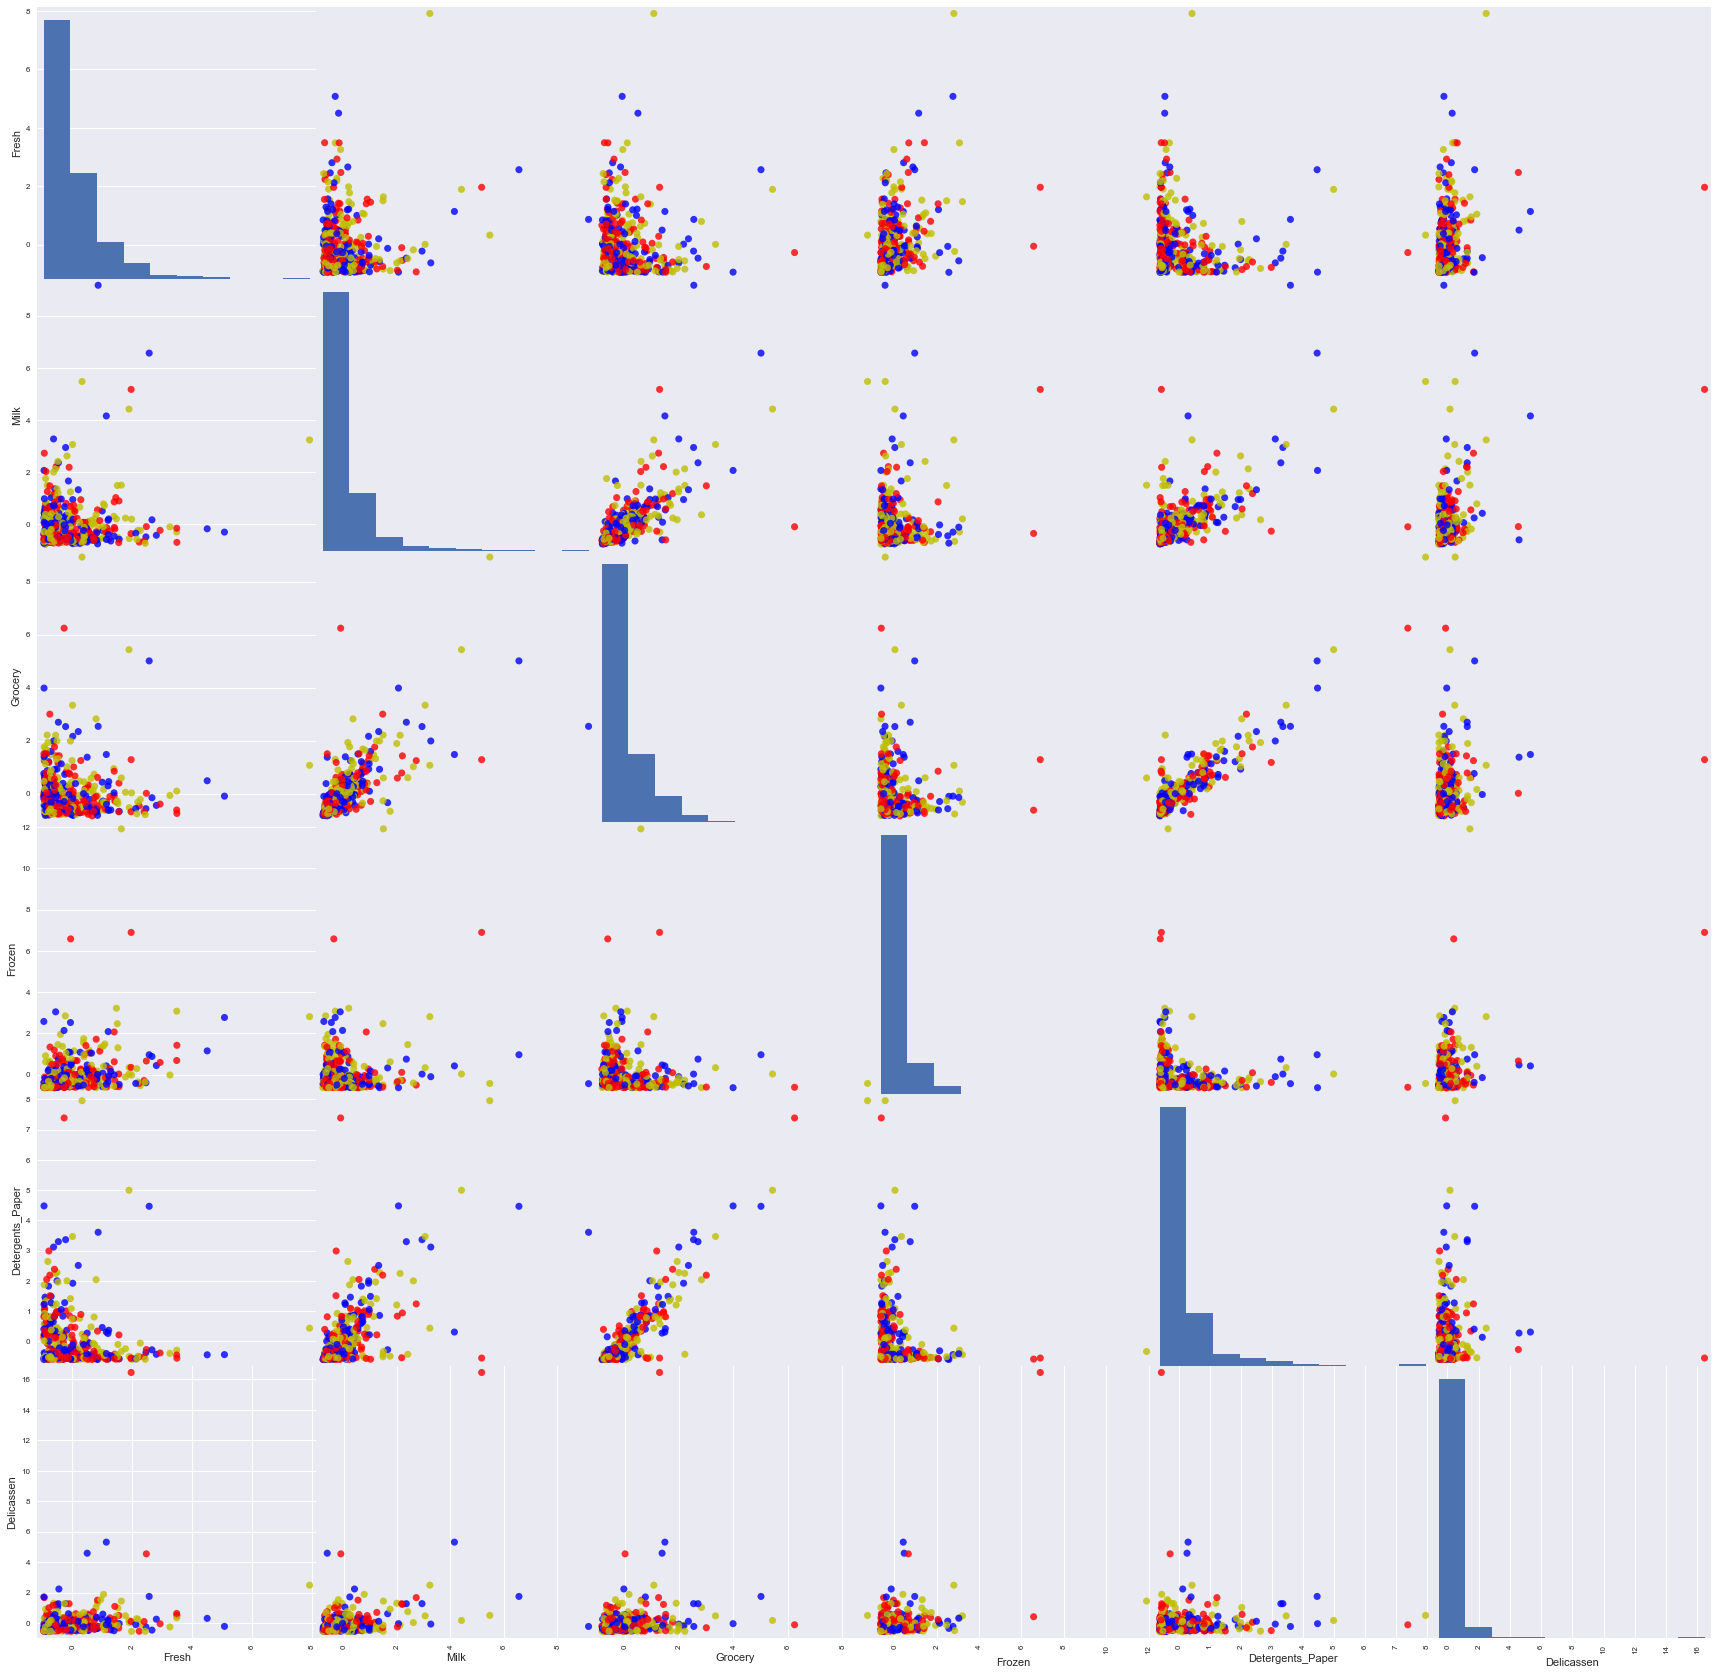

In [12]:
pd.plotting.scatter_matrix(X, c=['r', 'y', 'b'], figsize=(30, 30), s=200, alpha=.8);

### Instead of doing this manually, let's build a class to do it automatically!

In [13]:
class Kmeans(object):
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, epsilon=0.001):
        self.centroids = X.sample(self.k)
        
        centroid_movement = np.inf
        
        while centroid_movement > epsilon:
            distances = euclidean_distances(X, self.centroids)
            self.labels = np.argmin(distances, axis=1)
            
            centroids_old = self.centroids.copy()
            
            for centroid in range(self.k):
                self.centroids[centroid] = X[self.labels == centroid].mean(axis=0)
            
            difference = centroids_old - self.centroids
            centroid_movement = np.linalg.norm(difference, axis=1).mean()

In [14]:
k = Kmeans()
k.fit(X)

/Users/Arya/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/generic.py:5752: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  other.columns, how=join, level=level, return_indexers=True)


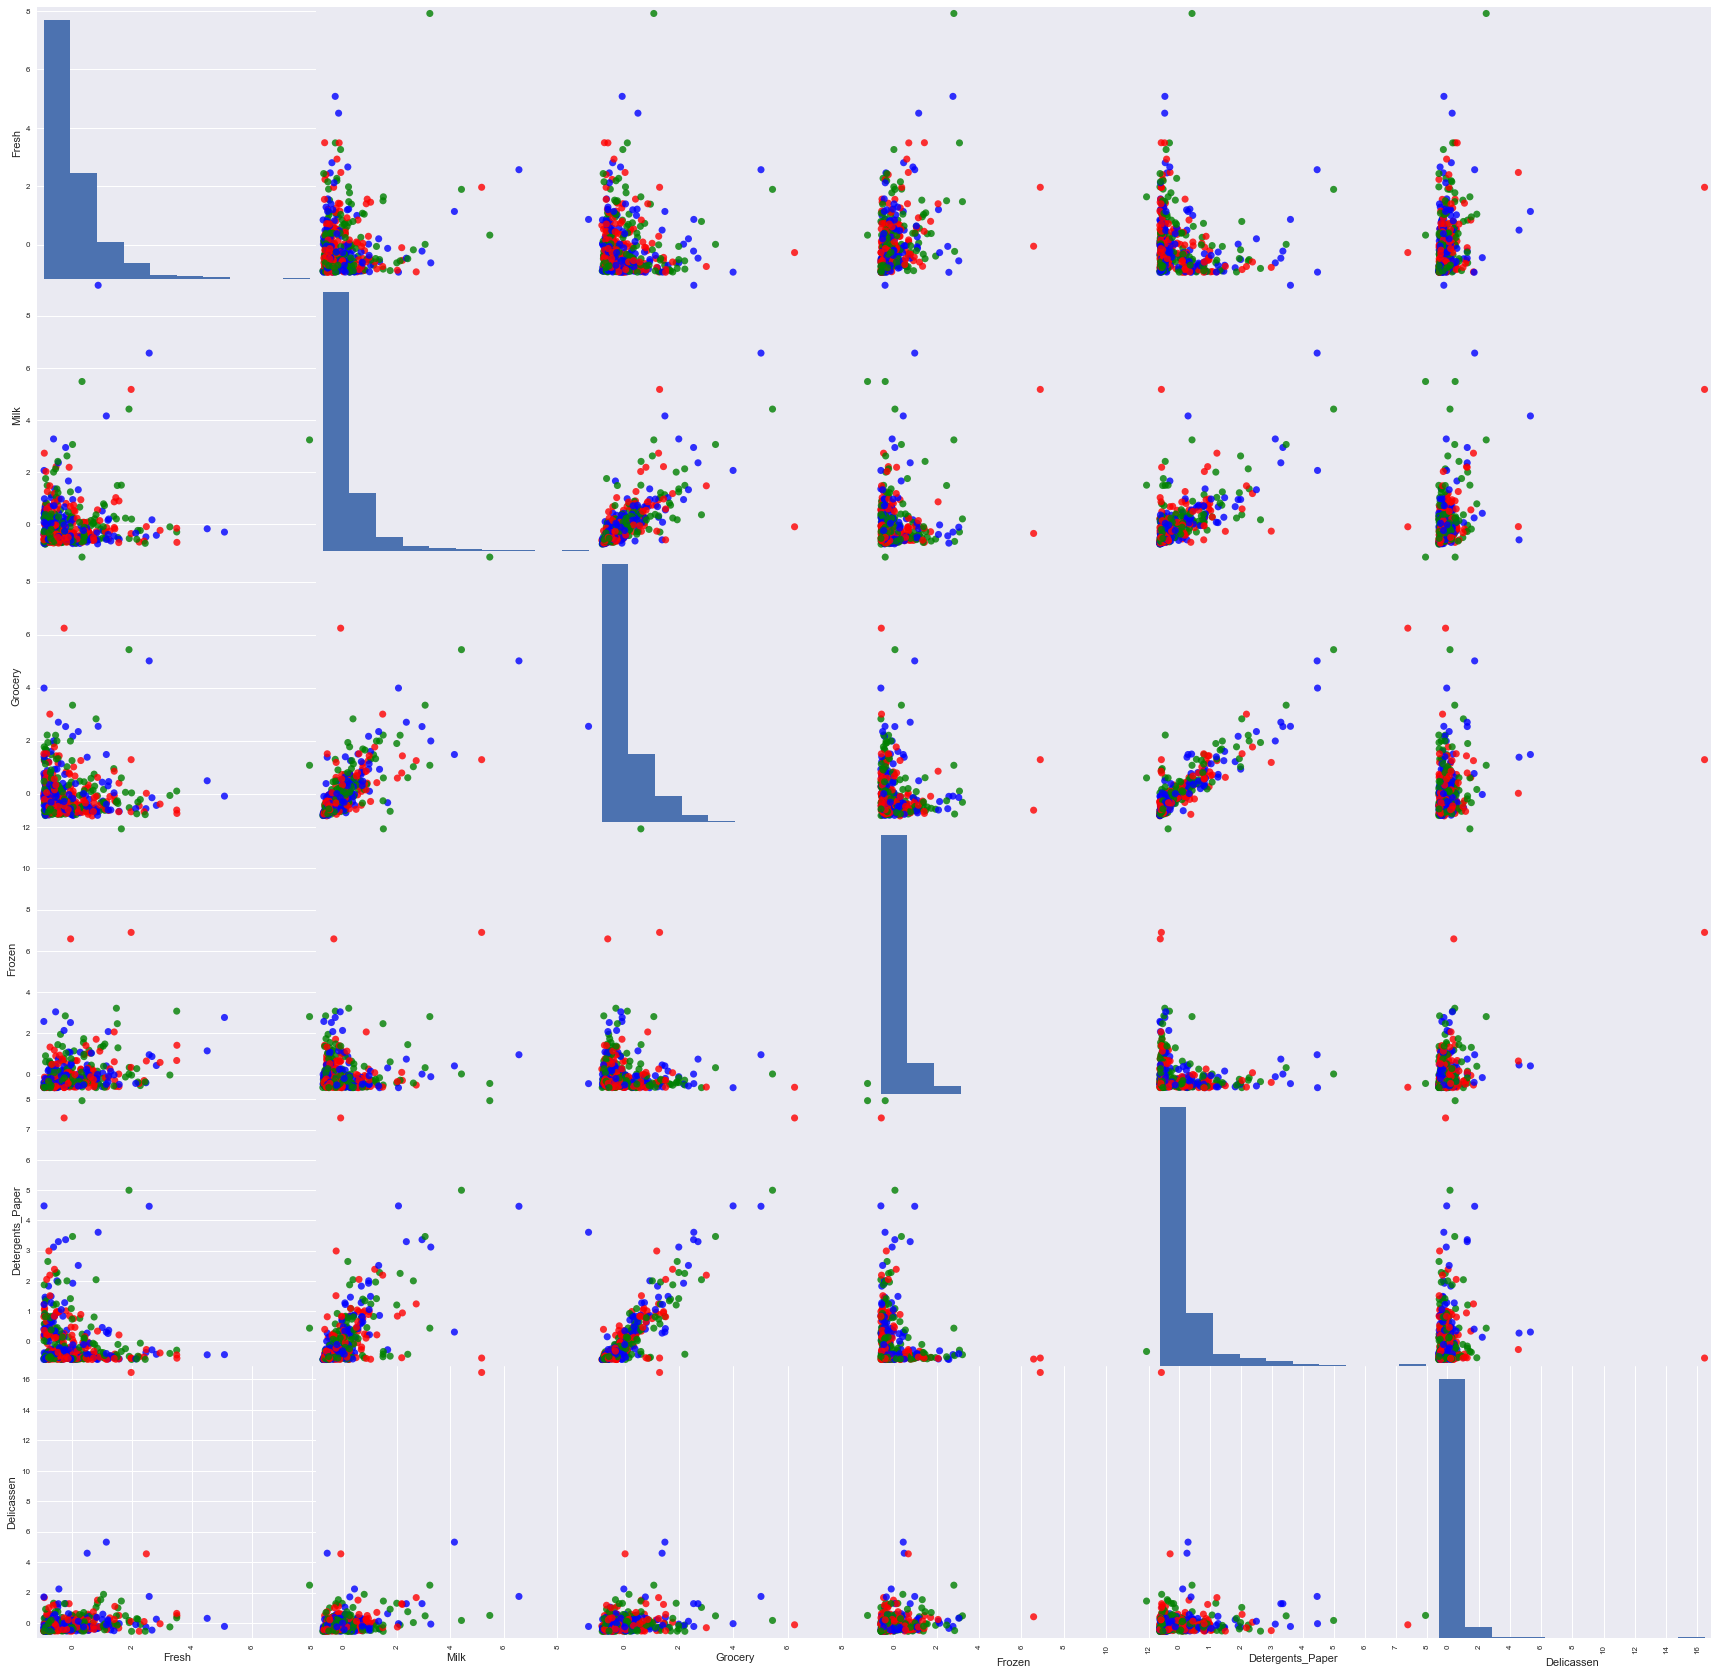

In [15]:
pd.plotting.scatter_matrix(X, c=['r', 'g', 'b'], figsize=(30, 30), s=200, alpha=.8);

### Is it possible to evaluate these clusters? What happens if we try?

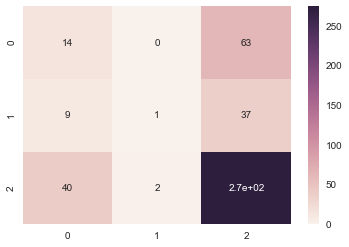

In [16]:
from sklearn.metrics import confusion_matrix

y_true = df['Region'] - 1
y_pred = k.labels

con_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(con_mat, annot=True);